<a href="https://colab.research.google.com/github/hany606/ICV_Fall21IU/blob/main/Exams/Hany_Hamed_Final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam:

# Hany Hamed

**Introduction to Computer Vision (Fall 2021)**

Instructor: BEKKOUCH Imad Eddine Ibrahim

TA: Karam Almaghout


----------------------------------------
### **Final Exam**

09.10.2021

duration 1 hour

**Note** We should be able to run your code in order to evaluate it

### Submission format
- .ipynb file (Colab link is not allowed!!!)

### Allowed to use during the exam
- OpenCV and other libraries
- Lab code
- Internet resources
- OpenCV documentation

### Not allowed
- Copy paste from other people
- Turn off the camera during the exam (For online students)

**NOTE** Expected results are provided here, so make a copy of this lab and compare what you have with the correct results


### **Q1. Face Detection (70%)**

Detect the faces in the image using Viola Jones algorithm. 

Draw an ellips around the detected faces.

If there is an overlap, remove this overlaping to have only one bounding ellipse.

crop a detected face (choose any face) and place it on another face same as in this image

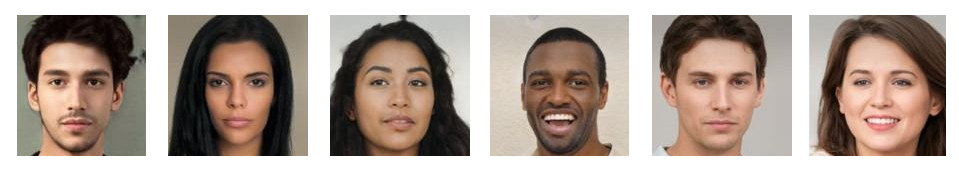

### a) Download, read and show the image (5%)
### b) Detect Faces and print number of detected faces. (10%)
### c) Draw an ellips around the detected faces.(10%)

### d) crop two of detected faces (choose any faces) and save them in new different images (img1 and img2). (10%)
### e) crop face of img1 (within the ellipse chape). (20%)
### f) place the cropped face of img1 in img2. (15%)

import Libraries, you can use other libraries

In [ ]:
import cv2
import time
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)

In [ ]:
# Download image
!wget https://www.dropbox.com/s/i9elsthjnvkr32m/exam2.jpg?dl=0 -O faces.jpg
clear_output()
print('Download completed!')

Download completed!


download haarcascade_frontalface_default.xml file for Viola Jones algorithm

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
clear_output()
print('Download completed!')

Download completed!


Read and Display the image

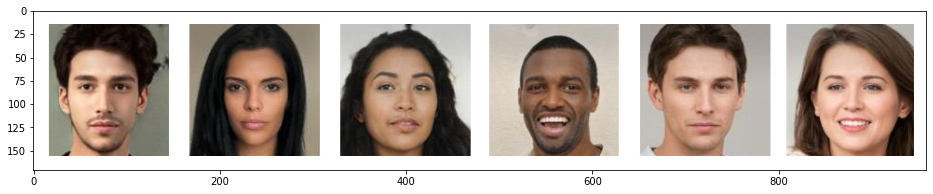

In [ ]:
# Write your code here
# Source: labs
def read_and_resize(filename, grayscale = False, fx= 1, fy=1):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

faces_img = read_and_resize("faces.jpg")
showInRow([faces_img])

Detect the faces and do tasks, your results should be similar to what you have now.

**you can use any two faces**

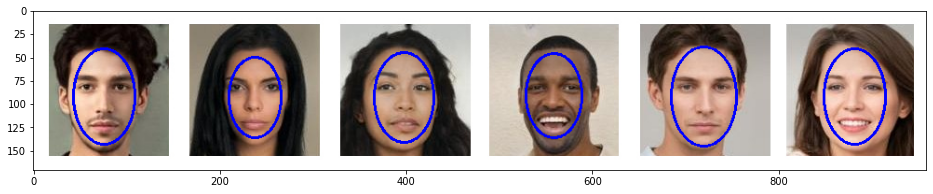

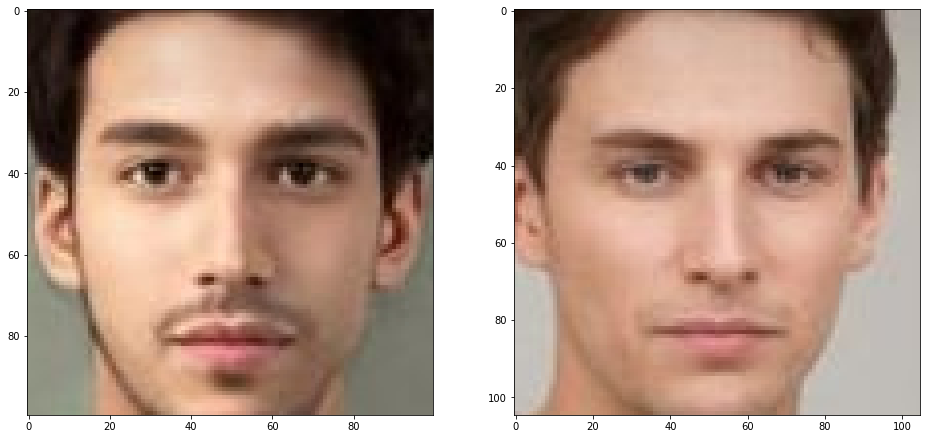

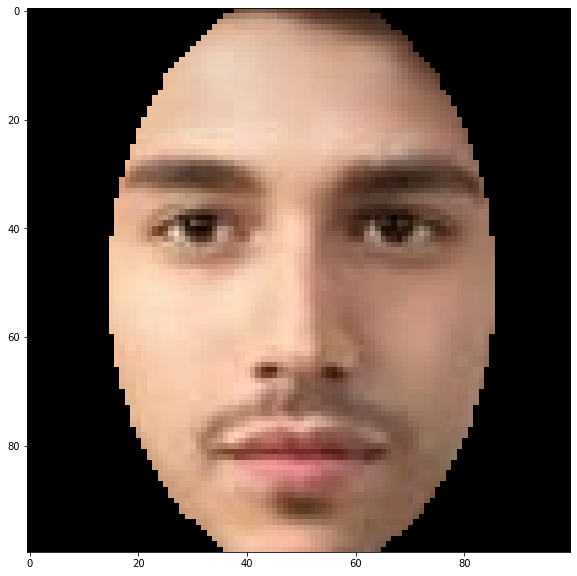

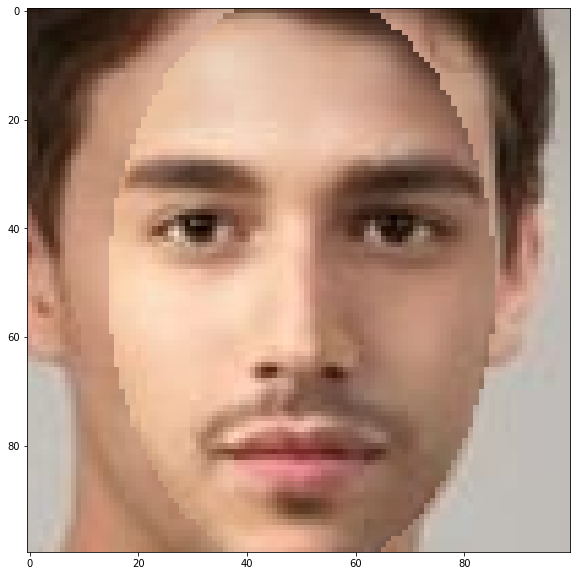

In [ ]:
# Write your code here

faces_img_copy = faces_img.copy()


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

start = time.time()
faces = face_cascade.detectMultiScale(faces_img)

for (x,y,w,h) in faces:
    cv2.ellipse(faces_img_copy, (x+w//2, y+h//2), (h//2+h//100, w//3), 90, 0, 360, (0, 0, 255), 2)

showInRow([faces_img_copy])

selected_faces = faces_img.copy()
face1_idx = 0
face2_idx = 2

face1 = selected_faces[faces[face1_idx][1]:faces[face1_idx][1]+faces[face1_idx][3], faces[face1_idx][0]:faces[face1_idx][0]+faces[face1_idx][2]]
face2 = selected_faces[faces[face2_idx][1]:faces[face2_idx][1]+faces[face2_idx][3], faces[face2_idx][0]:faces[face2_idx][0]+faces[face2_idx][2]]
showInRow([face1, face2])



# Source: https://answers.opencv.org/question/25523/extract-an-ellipse-form-from-an-image-instead-of-drawing-it-inside/
mask1 = np.zeros_like(face1)
rows1, cols1,_ = mask1.shape
axes_face1 = (faces[face1_idx][3]//2+faces[face1_idx][3]//30,faces[face1_idx][2]//3+faces[face1_idx][2]//40)

mask1=cv2.ellipse(mask1, center=(rows1//2, cols1//2), axes=axes_face1, angle=90, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)
result1 = np.bitwise_and(face1, mask1)
showInRow([result1])


mask2 = np.zeros_like(face2)
rows2, cols2,_ = mask2.shape
axes_face2 = (faces[face2_idx][3]//2+faces[face2_idx][3]//100,faces[face2_idx][2]//3)

mask2=cv2.ellipse(mask2, center=(rows2//2, cols2//2), axes=axes_face2, angle=90, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)
mask2_inv = cv2.bitwise_not(mask2)

result2 = np.bitwise_and(face2, mask2_inv)
result2 = np.bitwise_and(face2, mask2_inv)

result = result2.copy()[2:102,2:102,:] + result1
showInRow([result])


### **Q2. Hough Transform (30%)**

write a code that does :

a) Read and show the image. (5%)

b) Use Hough transform to detect the lines in the image. (10%)

c) Draw the horizontal lines in green (5%)*italicized text*

d) Draw the vertical lines in red (5%)

e) Compute the the number of lines and cells. (5%)


In [ ]:
!wget https://t3.ftcdn.net/jpg/01/79/98/92/360_F_179989207_ZI8skwgg5C269G4RHqFdtFuUmhpUIhUi.jpg -O chess.jpg
clear_output()
print('Download completed!')

Download completed!


Read and display the image

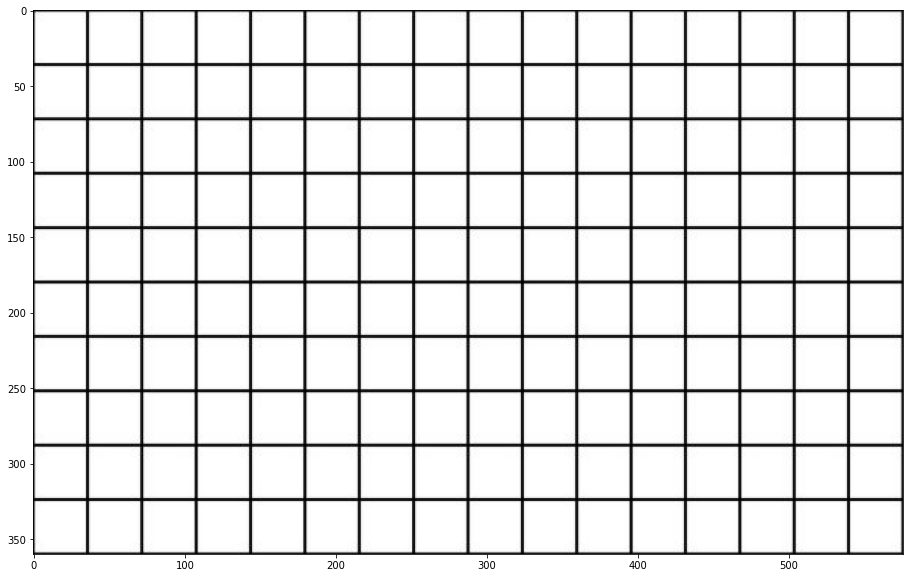

In [ ]:
# Write your code here
board = read_and_resize("chess.jpg")
showInRow([board])

Implement Hough transform and do the tasks, your results should be EXACTLY to what you have now.

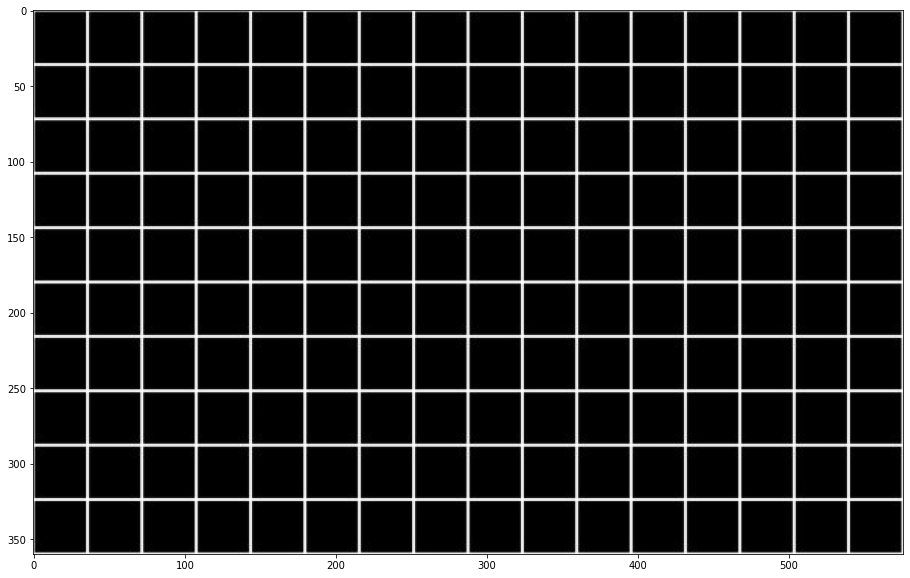

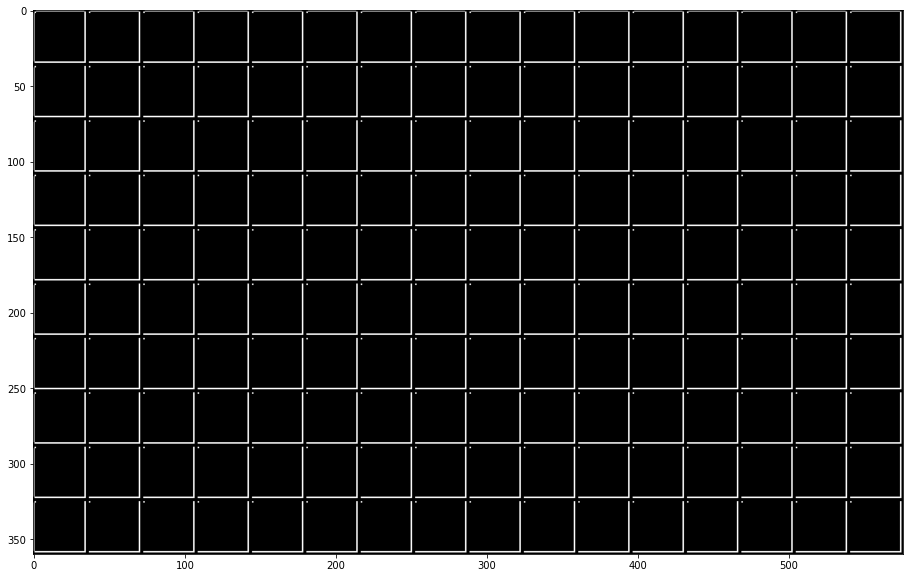

number of lines = 28
vertical lines = 17
horizontal lines = 11
number of cells = 187


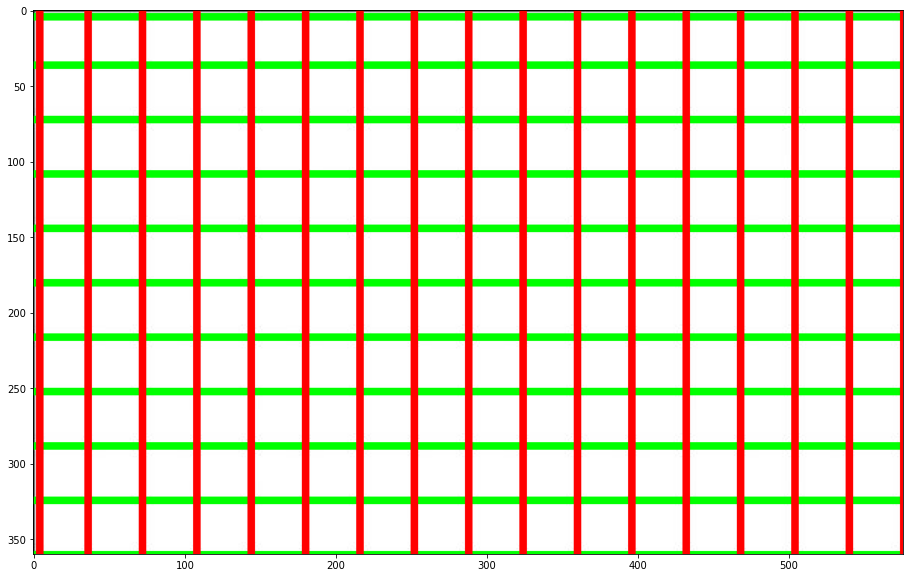

In [ ]:
# write your code here 
img = cv2.bitwise_not(board.copy())
showInRow([img])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(thresh1, 100, 200)
showInRow([edges])

# Source: during the lab
lines_r = cv2.HoughLines(edges,3,np.pi/180,300)

vertical_lines = []
horizontal_lines = []

for i in range(len(lines_r)):
    for rho,theta in lines_r[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        if a == 1.0:
            vertical_lines.append([x1, y1, x2, y2])
        else:
            horizontal_lines.append([x1, y1, x2, y2])

vertical_lines.sort(key=lambda x: x[0])
horizontal_lines.sort(key=lambda x: x[1])


num_cells = len(vertical_lines)*len(horizontal_lines)
print(f"number of lines = {len(vertical_lines) + len(horizontal_lines)}")
print(f"vertical lines = {len(vertical_lines)}")
print(f"horizontal lines = {len(horizontal_lines)}")
print(f"number of cells = {num_cells}")

board_copy = board.copy()
for i in range(len(horizontal_lines)):
    x1 = horizontal_lines[i][0]
    y1 = horizontal_lines[i][1]
    x2 = horizontal_lines[i][2]
    y2 = horizontal_lines[i][3]
    
    cv2.line(board_copy,(x1,y1+5),(x2,y2+5),(0,255,0),3)


for i in range(len(vertical_lines)):
    x1 = vertical_lines[i][0]
    y1 = vertical_lines[i][1]
    x2 = vertical_lines[i][2]
    y2 = vertical_lines[i][3]
    
    cv2.line(board_copy,(x1+5,y1),(x2+5,y2),(255,0,0),3)

showInRow([board_copy])
